# Average Cloudsat profiles for JJA 2006 - 2010 

## Height - latitude graphs

In [28]:
import h5py
import numpy as np 
import matplotlib.pyplot as plt
import glob
import xarray as xr 

In [29]:
def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [178]:
# get height- latitude average 
target_lats = np.arange(20,45,0.1)
target_count = np.zeros(target_lats.shape)
cloudsat_profile= np.zeros((target_lats.size, 125))
average_dem  = np.zeros(target_lats.shape)
mean_heights = np.zeros((125,))

In [55]:
files = glob.glob('/media/juli/Elements/CLOUDSAT_TP/2B_GEOPROF-LIDAR/tinghai/2006_*_*_*_*.hdf5')

In [56]:
f= h5py.File(files[1], 'r+')
list(f.keys())

['CloudFraction',
 'CloudLayers',
 'DEM_elevation',
 'DistanceAvg',
 'FlagBase',
 'FlagTop',
 'Height',
 'Latitude',
 'LayerBase',
 'LayerTop',
 'Longitude',
 'NumLidar',
 'Profile_time',
 'UTC_start']

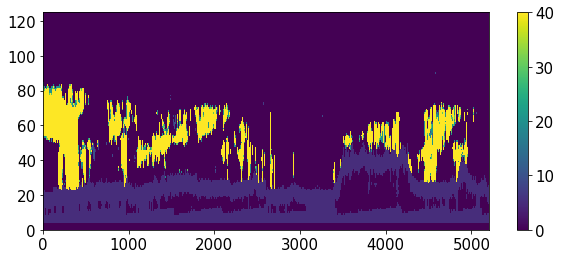

In [929]:
plt.figure(figsize= (10,4))
f=h5py.File(files[0], 'r+')
radar= np.array(f['CPR_Cloud_mask'])
plt.pcolormesh(np.flip(radar.T, axis =0 )) 
plt.colorbar()
plt.show()

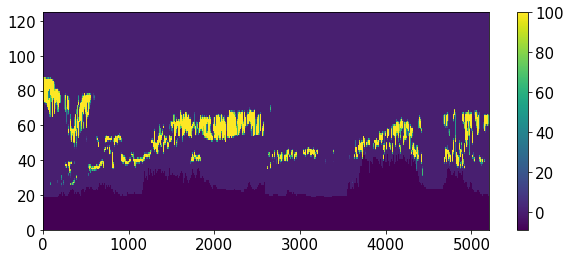

In [894]:
plt.figure(figsize= (10,4))
f=h5py.File(files[0], 'r+')
lidar= np.array(f['CloudFraction'])
plt.pcolormesh(np.flip(lidar.T, axis =0 )) 
plt.colorbar()
plt.show()

In [26]:
for file in files:
    tp=0
    #print(file)
    f= h5py.File(file, 'r+')
    # get variables
    cf_lidar= f['CPR_Cloud_mask']
    cf_lidar= np.array(cf_lidar)
    #cf_lidar[cf_lidar < 0]= np.nan
    
    # radar reflectvity
    #cf_lidar= f['CloudFraction']
    #cf_lidar=np.array(cf_lidar)
    
    # cloud mask 
    cf_lidar[cf_lidar < 20]= 0 
    cf_lidar[cf_lidar >=20] = 1 
    
    #cf_lidar = 10 * np.log10(cf_lidar, where= cf_lidar > 0)
    #cf_lidar[cf_lidar < -30]= -30
    #cf_lidar[cf_lidar > 40]= 40

    lons = f['Longitude']
    lats= f['Latitude']    
    dem= f["DEM_elevation"]
    lats=np.array(lats)
    lons=np.array(lons)
    dem= np.array(dem)
    lats=np.array(lats)
    lons=np.array(lons)
    heights = np.array(f['Height'])
    f.close()
    
    # for each file: extract region 
    cf_lidar_TP = np.zeros((125,))
    lats_TP = np.array(())
    lons_TP = np.array(())
    dem_TP = np.array(())
    height_TP = np.zeros((125,))

    for i,value in enumerate(lons):
        if lats[i] >= 20 and lats[i] <= 45 and value >= 80 and value < 90 :
            # and dem[i] >= 3000
            cf_lidar_TP= np.vstack([cf_lidar_TP,cf_lidar[i, :]])
            height_TP= np.vstack([height_TP,heights[i, :]])
            lats_TP= np.append(lats_TP,lats[i])
            lons_TP= np.append(lons_TP,lons[i])
            dem_TP= np.append(dem_TP,dem[i])
            tp= 1 
                        
    lats=np.array(lats)
    lons=np.array(lons)
    if tp==1:
        # loop through profiles
        for l in np.arange(cf_lidar_TP.shape[0]-1):
            # find nearest in target lons / lats 
            idx = find_nearest_idx(lats_TP[l], target_lats)            
            # add average over latitudes in target 
            cloudsat_profile[idx, :] += cf_lidar_TP[l]
            target_count[idx] += 1
            average_dem[idx] += dem_TP[l]
            mean_heights+= np.nanmean(height_TP, axis = 0)

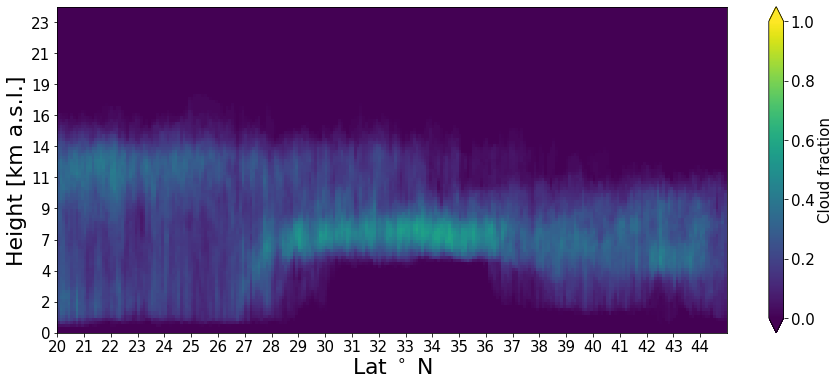

In [13]:
from matplotlib import colors
import matplotlib

from matplotlib.colors import Normalize
plt.figure(figsize=(15,6))
s= 15 


r = np.arange(0,12,2)
#r = np.arange(-30,40,2)

norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)

plt.pcolormesh(np.flip(cloudsat_prof, axis =0), norm=Normalize(0,1) )

plt.xticks(np.arange(target_lats.shape[0])[::10],labels= target_lats[::10].astype(int))

plt.yticks(np.arange(20,125)[::10], (average_heights[20:125:10]/1000).astype(int))
plt.ylim(20,125)

plt.plot(average_dem/target_count/1000)
plt.xlabel('Lat $^\circ$ N', fontsize= 22)
plt.ylabel('Height [km a.s.l.]', fontsize= 22)
plt.colorbar(extend = 'both', label = 'Cloud fraction')

matplotlib.rc('xtick', labelsize=s) 
matplotlib.rc('ytick', labelsize=s) 
plt.rcParams.update({'font.size': s})

# create colormap 
cmap=plt.get_cmap()
# use white color to mark 'bad' values
cmap.set_bad(color='lightgray')

plt.savefig('CloudSat_radar-cloudfraction_summer_80-90_2010.png')
plt.show()

In [27]:
# calculate average cloud fraction 
cloudsat_prof = cloudsat_profile.T/ target_count
average_heights =np.flip(mean_heights/np.nansum(target_count), axis = 0)

data_vars= dict(cloud_fraction=(["height", "latitude"], cloudsat_prof))
coords = dict( latitude= target_lats, height=( np.flip(average_heights, axis =0)))
data= xr.Dataset(data_vars= data_vars, coords = coords)
data.to_netcdf('CloudSat_profile_summer_2006_80-90E.nc')

## Height- longitude

In [ ]:
# get height- longitude average 
target_lons = np.arange(85,100,0.25)
target_count = np.zeros(target_lons.shape)
cloudsat_profile= np.zeros((target_lons.size, 125))
average_dem  = np.zeros(target_lons.shape)
mean_heights = np.zeros((125,))

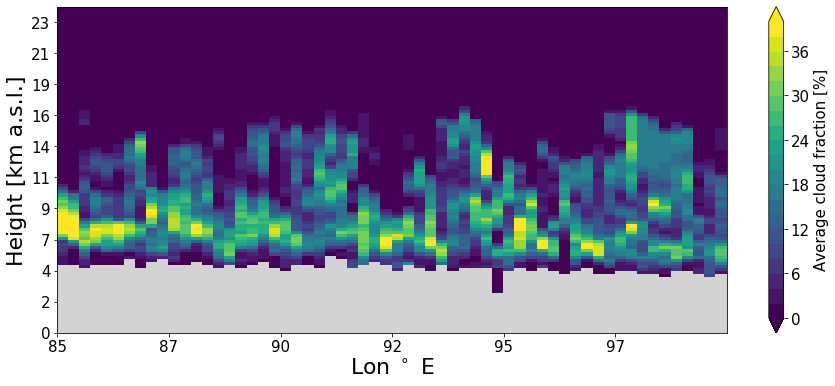

In [385]:
from matplotlib import colors
import matplotlib
plt.figure(figsize=(15,6))
s= 15 

# calculate average cloud fraction 
cloudsat_prof = cloudsat_profile.T/ target_count
average_heights =np.flip(mean_heights/np.nansum(target_count), axis = 0)


r = np.arange(0,42,2)
norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)

plt.pcolormesh(np.flip(cloudsat_prof, axis =0), norm = norm )

plt.xticks(np.arange(target_lons.shape[0])[::10],labels= target_lons[::10].astype(int))

plt.yticks(np.arange(20,125)[::10], (average_heights[20:125:10]/1000).astype(int))
plt.ylim(20,125)

plt.plot(average_dem/target_count/1000)
plt.xlabel('Lon $^\circ$ E', fontsize= 22)
plt.ylabel('Height [km a.s.l.]', fontsize= 22)
plt.colorbar(extend = 'both', label = 'Average cloud fraction [%]')

matplotlib.rc('xtick', labelsize=s) 
matplotlib.rc('ytick', labelsize=s) 
plt.rcParams.update({'font.size': s})

plt.savefig('CloudSat_cloud_fraction_summer_32-37_2010_day.png')
plt.show()

In [386]:
import xarray as xr 
data_vars= dict(cloud_fraction=(["height", "longitude"], cloudsat_prof))
coords = dict( latitude= target_lons, height=( np.flip(average_heights, axis =0)))
data= xr.Dataset(data_vars= data_vars, coords = coords)
data.to_netcdf('CloudSat_profile_summer_2010_33-36N_2010_day.nc')

# DARDAR profiles 

In [755]:
files = glob.glob('/media/juli/Elements/DARDAR/DARDAR_2010*_daytime_overpass.nc')


## Latitudinal Averages

In [773]:
# get height- latitude average 
target_lats = np.arange(20,45,0.1)
target_count = np.zeros(target_lats.shape)
cloudsat_profile= np.zeros((target_lats.size, 436))


for file in files:
    tp=0
    #print(file)
    f= xr.open_dataset(file)
    # get variables
    cf_lidar= f['ice_water_content'].values
    #cf_lidar = 10 * np.log10(cf_lidar, where= cf_lidar > 0)
    #cf_lidar[cf_lidar < -30]= -30
    #cf_lidar[cf_lidar > 40]= 40

    lons = f['lon'].values
    lats= f['lat'].values
    heights = f['heights'].values
    f.close()
    
    # for each file: extract region 
    cf_lidar_TP = np.zeros((436,))
    lats_TP = np.array(())
    lons_TP = np.array(())
    height_TP = np.zeros((436,))

    for i,value in enumerate(lons):
        if lats[i] >= 20 and lats[i] <= 45 and value >= 80 and value < 90 :
            # and dem[i] >= 3000
            cf_lidar_TP= np.vstack([cf_lidar_TP,cf_lidar[i, :]])
            lats_TP= np.append(lats_TP,lats[i])
            lons_TP= np.append(lons_TP,lons[i])
            tp= 1 
                        
    lats=np.array(lats)
    lons=np.array(lons)
    if tp==1:
        # loop through profiles
        for l in np.arange(cf_lidar_TP.shape[0]-1):
            # find nearest in target lons / lats 
            idx = find_nearest_idx(lats_TP[l], target_lats)
            # add average over latitudes in target 
            cloudsat_profile[idx, :] += cf_lidar_TP[l]
            target_count[idx] += 1

## Plot

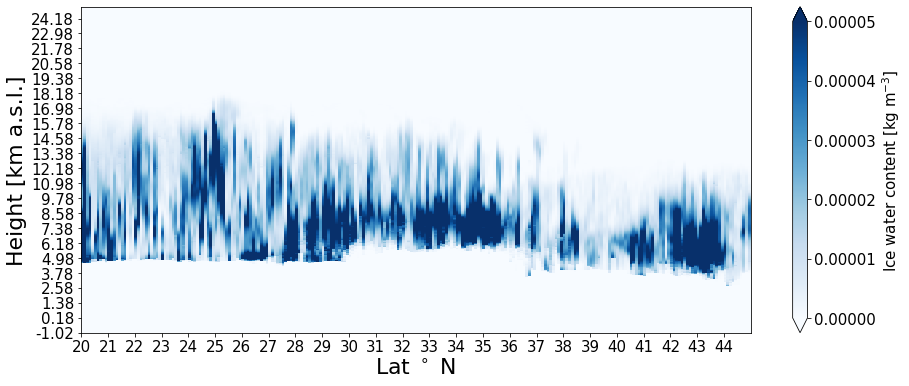

In [765]:
from matplotlib import colors
import matplotlib

from matplotlib.colors import Normalize
plt.figure(figsize=(15,6))
s= 15 

# calculate average cloud fraction 
cloudsat_prof = cloudsat_profile.T/ target_count
#average_heights =np.flip(mean_heights/np.nansum(target_count), axis = 0)


r = np.arange(0,10,1)
norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)

plt.pcolormesh(np.flip(cloudsat_prof, axis =0), norm= Normalize(0,0.00005) , cmap = 'Blues')

plt.xticks(np.arange(target_lats.shape[0])[::10],labels= target_lats[::10].astype(int))

plt.yticks(np.arange(436)[::20], heights[::20])


#plt.plot(average_dem/target_count/1000)
plt.xlabel('Lat $^\circ$ N', fontsize= 22)
plt.ylabel('Height [km a.s.l.]', fontsize= 22)
plt.colorbar(extend = 'both', label = 'Ice water content [kg m$^{-3}$]')

matplotlib.rc('xtick', labelsize=s) 
matplotlib.rc('ytick', labelsize=s) 
plt.rcParams.update({'font.size': s})

# create colormap 
cmap=plt.get_cmap()
# use white color to mark 'bad' values
cmap.set_bad(color='lightgray')

plt.savefig('dardar_iwc_summer_80-90_2010_day.png')
plt.show()

## Save file 

In [775]:
cloudsat_prof = cloudsat_profile.T/ target_count
data_vars= dict(ice_water_content=(["height", "latitude"], cloudsat_prof))
coords = dict( latitude= target_lats, height=np.flip(heights, axis = 0))
attrs = dict(units= 'kg m-3')
data= xr.Dataset(data_vars= data_vars, coords = coords, attrs = attrs)
data.to_netcdf('dardar_summer_80-90N_iwc_2010_day.nc')

In [760]:
cloudsat_prof.shape

(436, 250)

In [772]:
heights.shape

(436,)

## Radar-lidar combined cloud fraction 

In [188]:
from os import path 

year = 2007

radar_dir = '/media/juli/Elements/CLOUDSAT_TP/2B_GEOPROF/tinghai/'
lidar_dir = '/media/juli/Elements/CLOUDSAT_TP/2B_GEOPROF-LIDAR/tinghai/'

radar_files = [path.basename(x) for x in glob.glob(radar_dir+ str(year)+'_*_*_*_day.hdf5')]
lidar_files = [path.basename(x) for x in glob.glob(lidar_dir+ str(year)+'_*_*_*_day.hdf5')]

intersection = set(radar_files) & set(lidar_files)
len(intersection)

86

In [190]:
for file in intersection:
    tp=0
    f1= h5py.File(radar_dir + file, 'r+')
    f2= h5py.File(lidar_dir + file, 'r+')
    
    # radar cloud mask 
    cf_radar= f1['CPR_Cloud_mask']
    cf_radar= np.array(cf_radar)
    cf_radar[cf_radar < 20]= 0 
    cf_radar[cf_radar >=20] = 1
    
    # take lidar cloud fraction, if not radar signal is there 
    cf_lidar= f2['CloudFraction']
    cf_lidar=np.array(cf_lidar)/100
    cf_lidar[cf_lidar < 0]= np.nan
    cf_lidar[cf_lidar > 100]= np.nan

    
    if cf_radar.shape == cf_lidar.shape:
        cf_lidar[cf_radar == 1] = 1
    else:
        #continue
        cf_lidar = cf_radar
        print(cf_lidar.shape)
        
    lons = f1['Longitude']
    lats= f1['Latitude']    
    lats=np.array(lats)
    lons=np.array(lons)
    heights = np.array(f1['Height'])
    f1.close()
    f2.close()
    
    # for each file: extract region 
    cf_lidar_TP = np.zeros((125,))
    lats_TP = np.array(())
    lons_TP = np.array(())
    dem_TP = np.array(())
    height_TP = np.zeros((125,))

    for i,value in enumerate(lons):
        if lats[i] >= 20 and lats[i] <= 45 and value >= 80 and value < 90 :
            # and dem[i] >= 3000
            cf_lidar_TP= np.vstack([cf_lidar_TP,cf_lidar[i, :]])
            height_TP= np.vstack([height_TP,heights[i, :]])
            lats_TP= np.append(lats_TP,lats[i])
            lons_TP= np.append(lons_TP,lons[i])
            tp= 1 
                        
    lats=np.array(lats)
    lons=np.array(lons)
    if tp==1:
        # loop through profiles
        for l in np.arange(cf_lidar_TP.shape[0]-1):
            # find nearest in target lons / lats 
            idx = find_nearest_idx(lats_TP[l], target_lats)            
            # add average over latitudes in target 
            cloudsat_profile[idx, :] += cf_lidar_TP[l]
            target_count[idx] += 1
            mean_heights+= np.nanmean(height_TP, axis = 0)
            
# calculate average cloud fraction 
cloudsat_prof = cloudsat_profile.T/ target_count
average_heights =np.flip(mean_heights/np.nansum(target_count), axis = 0)

data_vars= dict(cloud_fraction_combined=(["height", "latitude"], cloudsat_prof))
coords = dict( latitude= target_lats, height=( np.flip(average_heights, axis =0)))
data= xr.Dataset(data_vars= data_vars, coords = coords)
data.to_netcdf('Radar-lidar_profile_summer_2007_80-90E_day.nc')


(283, 125)


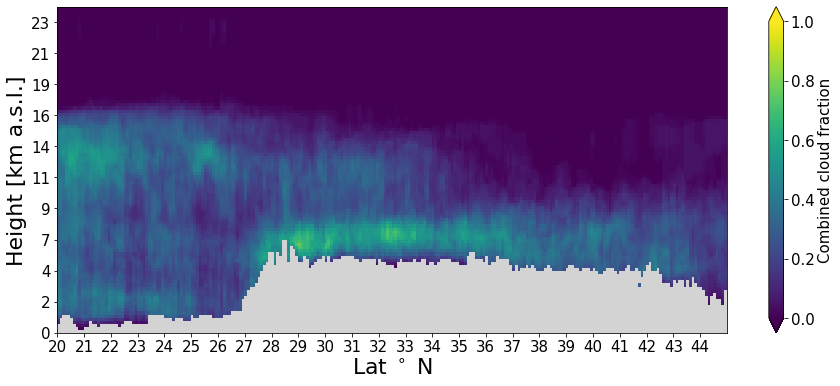

In [187]:
plt.figure(figsize=(15,6))
s= 15 

plt.pcolormesh(np.flip(cloudsat_prof, axis =0), norm=Normalize(0,1) )
plt.xticks(np.arange(target_lats.shape[0])[::10],labels= target_lats[::10].astype(int))

plt.yticks(np.arange(20,125)[::10], (average_heights[20:125:10]/1000).astype(int))
plt.ylim(20,125)

plt.plot(average_dem/target_count/1000)
plt.xlabel('Lat $^\circ$ N', fontsize= 22)
plt.ylabel('Height [km a.s.l.]', fontsize= 22)
plt.colorbar(extend = 'both', label = 'Combined cloud fraction')

matplotlib.rc('xtick', labelsize=s) 
matplotlib.rc('ytick', labelsize=s) 
plt.rcParams.update({'font.size': s})

# create colormap 
cmap=plt.get_cmap()
# use white color to mark 'bad' values
cmap.set_bad(color='lightgray')